In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from scipy.stats import rankdata
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import eli5
from eli5.sklearn import PermutationImportance
from scipy import stats
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print("finished")

finished


In [4]:
trainlfilepath="../input/tabular-playground-series-apr-2022/train_labels.csv"
dftrainl=pd.read_csv(trainlfilepath)

trainfilepath="../input/tabular-playground-series-apr-2022/train.csv"
dftrain=pd.read_csv(trainfilepath)

testfilepath="../input/tabular-playground-series-apr-2022/test.csv"
dftest=pd.read_csv(testfilepath)

subfilepath="../input/tabular-playground-series-apr-2022/sample_submission.csv"
dfsub=pd.read_csv(subfilepath)
dfsub

,sequence,state
0,25968,0
1,25969,0
2,25970,0
3,25971,0
4,25972,0
...,...,...
12213,38181,0
12214,38182,0
12215,38183,0
12216,38184,0


In [5]:
#merge labels to train data frame
df=dftrain.merge(dftrainl, on="sequence",how="left")
df

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749,0
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772,0
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389,0
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424,0


EDA step1: target distribution

<AxesSubplot:xlabel='state', ylabel='Density'>

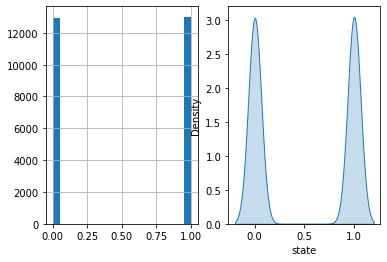

In [7]:
plt.subplot(121)
dftrainl["state"].hist(density=False, bins=20)
plt.subplot(122)
sns.kdeplot(dftrainl.state, shade=True)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='state', ylabel='Density'>

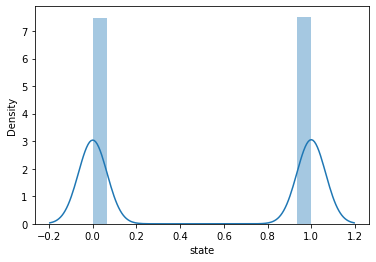

In [8]:
#distribution of target in one plot
sns.distplot(dftrainl.state)
#looks like half of state values is 0, 
#and second half of state values is 1
#so target is balanced

In [9]:
dftrainl.state.value_counts()
#yep, 0s and 1s states are distibuted almost equaly, only 2% difference

1    13014
0    12954
Name: state, dtype: int64

EDA step 2: features distribution

<AxesSubplot:>

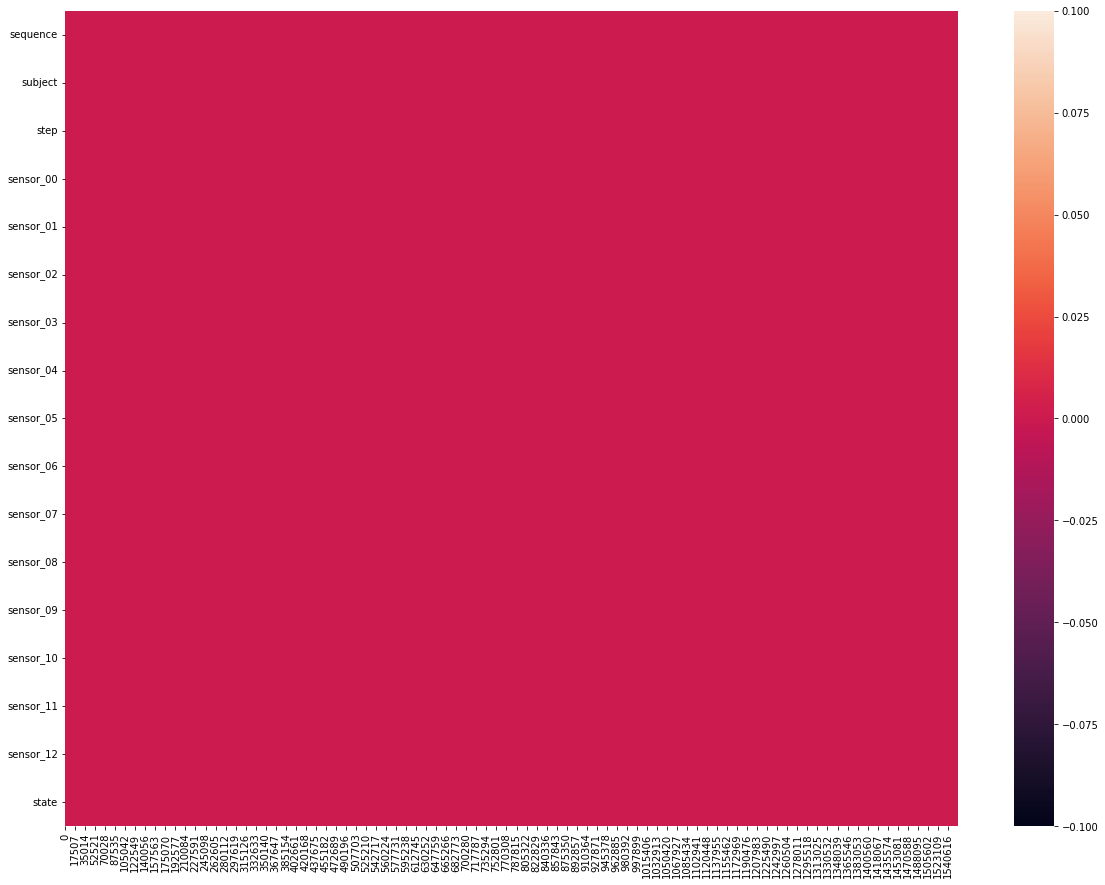

In [10]:
#check NA values
plt.figure(figsize=(20,15))
sns.heatmap(df.isna().transpose())
#has no white places so no NA values
#great!!!

array([[<AxesSubplot:title={'center':'sensor_00'}>,
        <AxesSubplot:title={'center':'sensor_01'}>,
        <AxesSubplot:title={'center':'sensor_02'}>,
        <AxesSubplot:title={'center':'sensor_03'}>],
       [<AxesSubplot:title={'center':'sensor_04'}>,
        <AxesSubplot:title={'center':'sensor_05'}>,
        <AxesSubplot:title={'center':'sensor_06'}>,
        <AxesSubplot:title={'center':'sensor_07'}>],
       [<AxesSubplot:title={'center':'sensor_08'}>,
        <AxesSubplot:title={'center':'sensor_09'}>,
        <AxesSubplot:title={'center':'sensor_10'}>,
        <AxesSubplot:title={'center':'sensor_11'}>],
       [<AxesSubplot:title={'center':'sensor_12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 1440x1080 with 0 Axes>

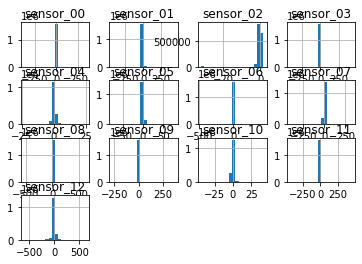

In [12]:
#features distribution and outliers
#check float features, i.e. sensors
plt.figure(figsize=(20,15))
dfnumfeatures=df.select_dtypes(include=["float64","float32","float16"])
dfnumfeatures.hist(bins=20)
#all sensors data are distributed mostly near median                                        

Boxplots for sensor values to see if many outliers

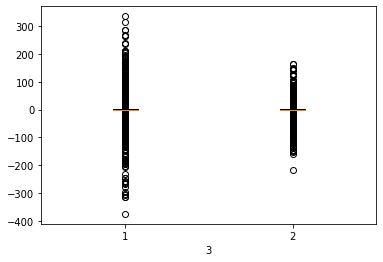

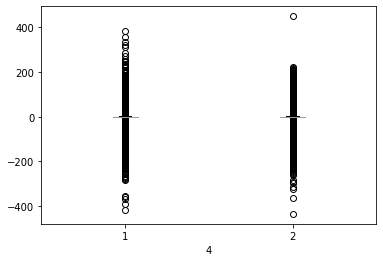

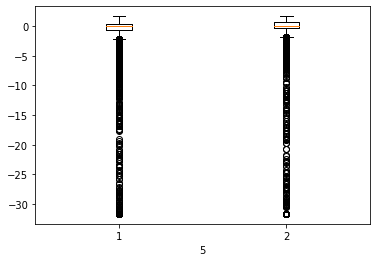

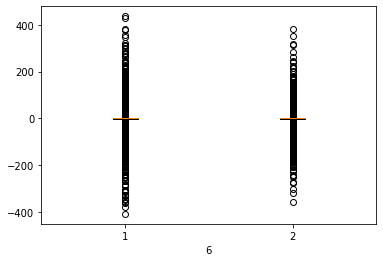

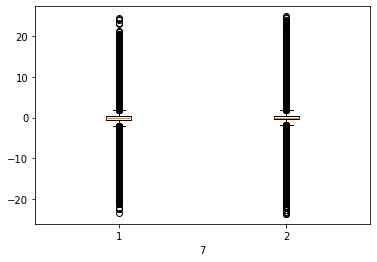

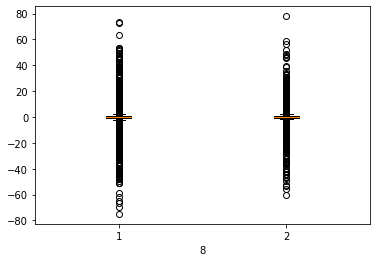

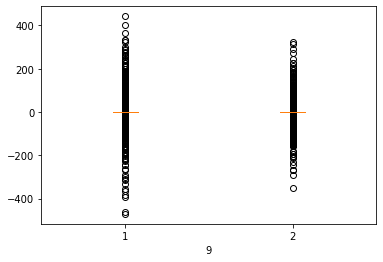

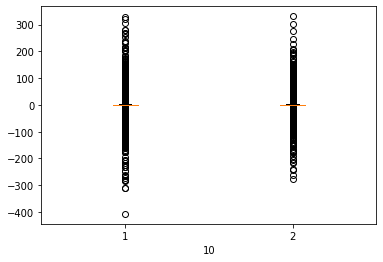

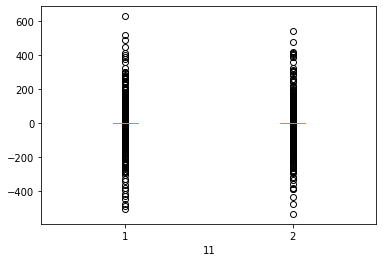

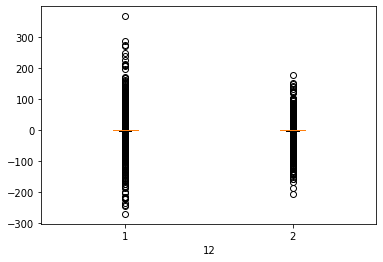

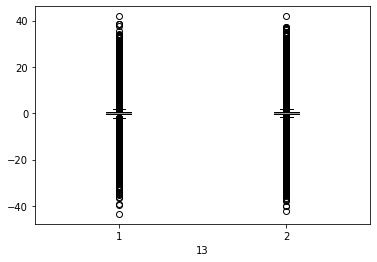

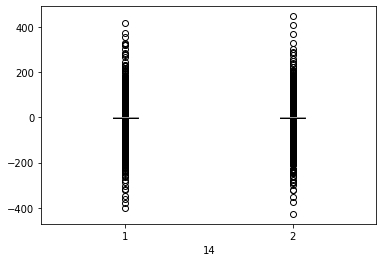

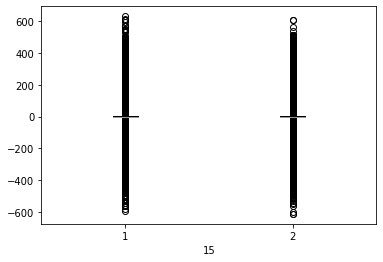

In [13]:
for i in range(3,16):
    data0=df.iloc[:,i][df.state==0]
    data1=df.iloc[:,i][df.state==1]
    plt.boxplot([data0,data1])
    plt.xlabel(i)
    plt.show()
#every sensor has a lot of outliers, boxes are not even visible

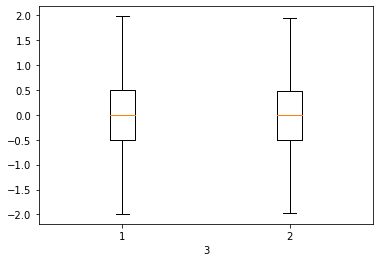

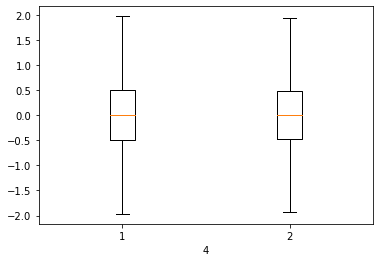

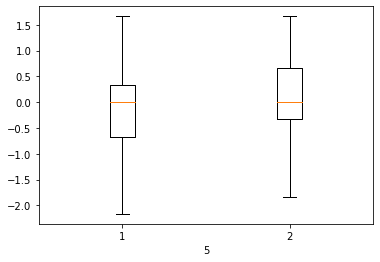

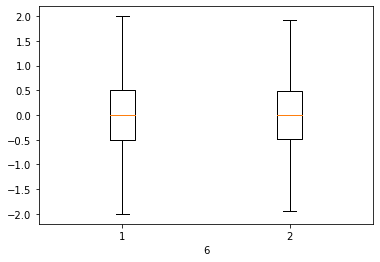

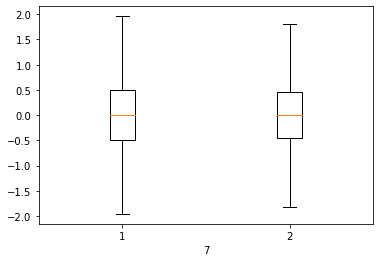

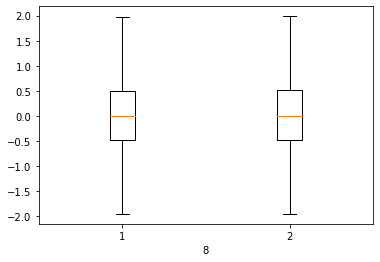

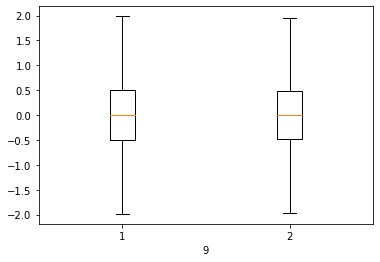

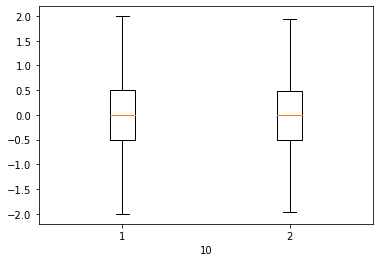

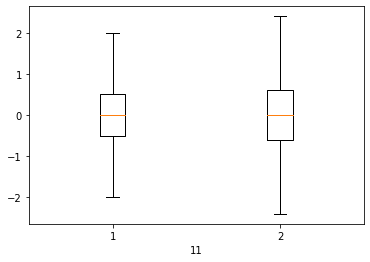

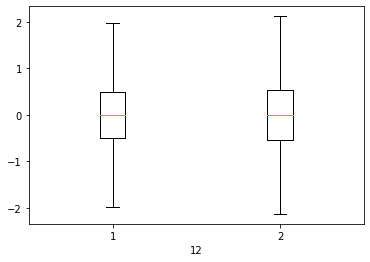

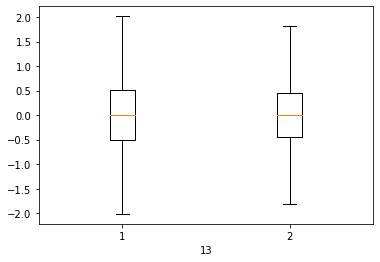

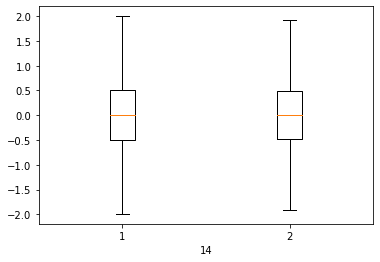

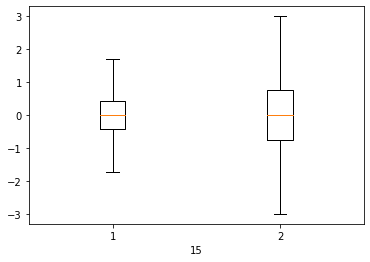

In [14]:
#remove outliers and look again
for i in range(3,16):
    data0=df.iloc[:,i][df.state==0]
    data1=df.iloc[:,i][df.state==1]
    plt.boxplot([data0,data1], showfliers=False)
    plt.xlabel(i)
    plt.show()
    
#almost all sensors range is in [-2:2]
# suppose need to do something with outliers
#median of all sensors are very very close to 0

Lineplots for sensors values to look if any patterns

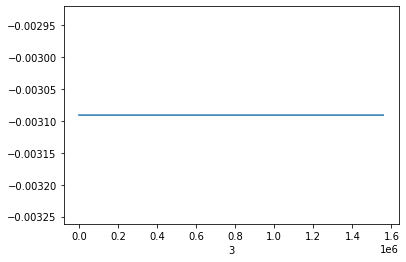

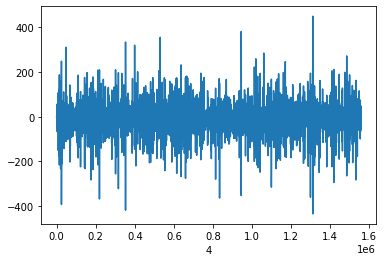

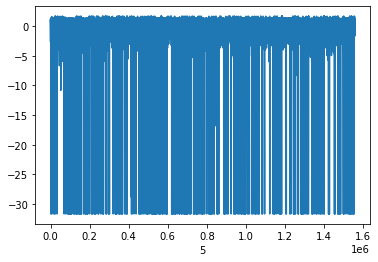

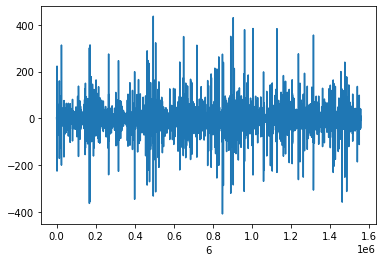

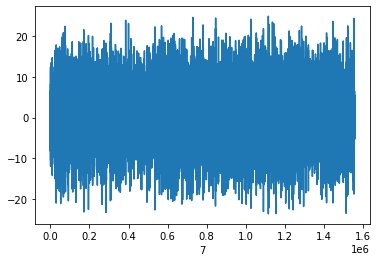

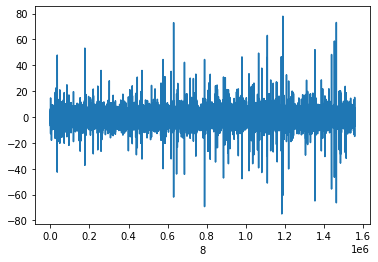

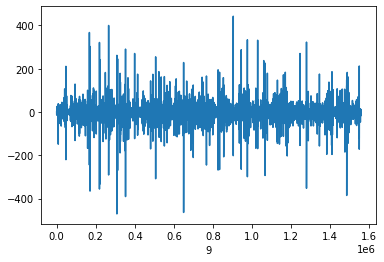

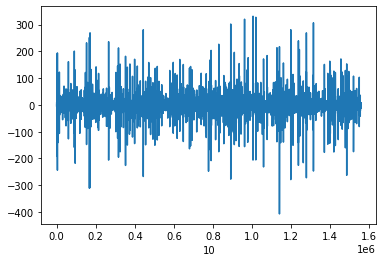

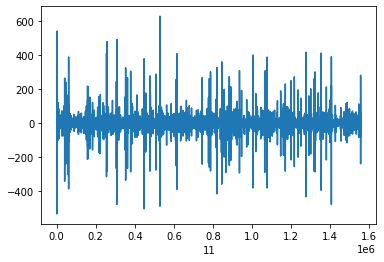

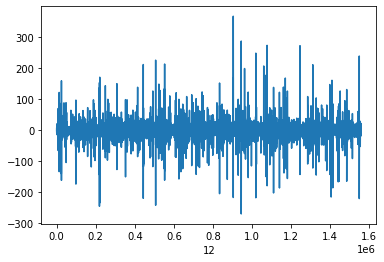

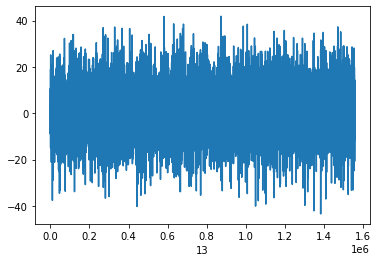

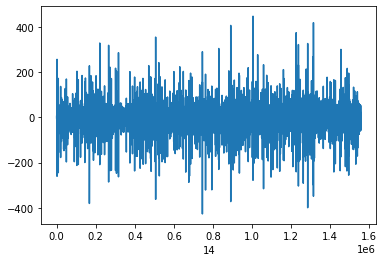

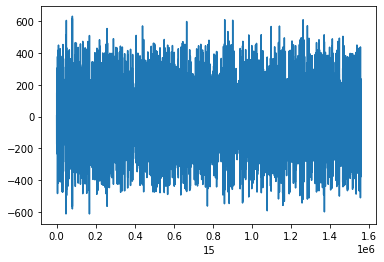

In [16]:
for i in range(3,16):
    plt.plot(df.iloc[:,i])
    plt.xlabel(i)
    plt.show()
#no patters, only observations that
# some sensors values are more close to 0 (like columns with id 3,6,8), others are wide (like 7,13,15columns)
# all sensors except sensor in column 5 are symmetric against 0 
#and sensor in column 5 is not simmetric against 0 (it's from 0 to -30)

Look at Subject feature 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[<AxesSubplot:title={'center':'sequence'}>,
        <AxesSubplot:title={'center':'subject'}>],
       [<AxesSubplot:title={'center':'step'}>, <AxesSubplot:>]],
      dtype=object)

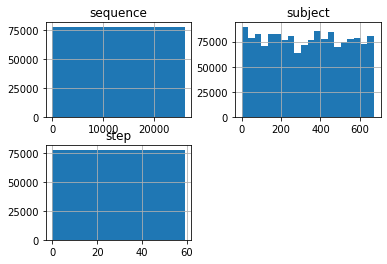

In [18]:
#features distribution  and outliers 
dfnumfeatures=df.select_dtypes(include=["int64","int32","int16"])
dfnumfeatures.drop("state", axis=1,inplace=True)
dfnumfeatures.hist(bins=20)
#uniform distribuion of sequence, step                                         

(array([  5., 162.,  15.,  12.,   9.,  39.,  12.,  28.,  29.,   9.,  35.,
          6.,  74.,   6.,  32.,  25.,   0.,  30.,   4.,  13.,  20.,   3.,
         52.,   6.,   1.,   0.,   5.,  27.,  50.,   8.,  57.,  15.,  25.,
         15.,  11.,  34.,   1.,   5.,   7.,   5.,  55.,  22.,  53.,  56.,
         12.,   0.,   9.,  78.,  36.,  13.,  13.,  17.,  36.,  19.,   0.,
          6.,  20.,  19.,  22.,  16.,  56.,  12.,   1.,   0.,  15.,  11.,
         13.,  14.,  10.,  14.,   3.,   4.,  22.,   0.,  35.,  61.,  35.,
          6.,  32.,   5.,   1.,  61.,  28.,   4.,  19.,   9.,  11., 118.,
         38.,  32.,  62.,  19.,   4.,  41.,  20.,  54.,  11.,   4.,   3.,
         11.,   6.,   7.,   0.,  13.,   2.,  14.,  11.,  24.,  26.,  12.,
         15.,  13.,   0.,   7.,  16.,  44.,   5.,  45.,  13.,  29.,   9.,
          2.,  12.,   8.,  33.,  86.,   0.,   1.,   7.,  13.,  20.,  15.,
          7.,  10.,  10.,   7.,   3.,   5.,  48.,  34.,   7.,  31.,  14.,
         19.,  18.,  13.,  49.,  45., 

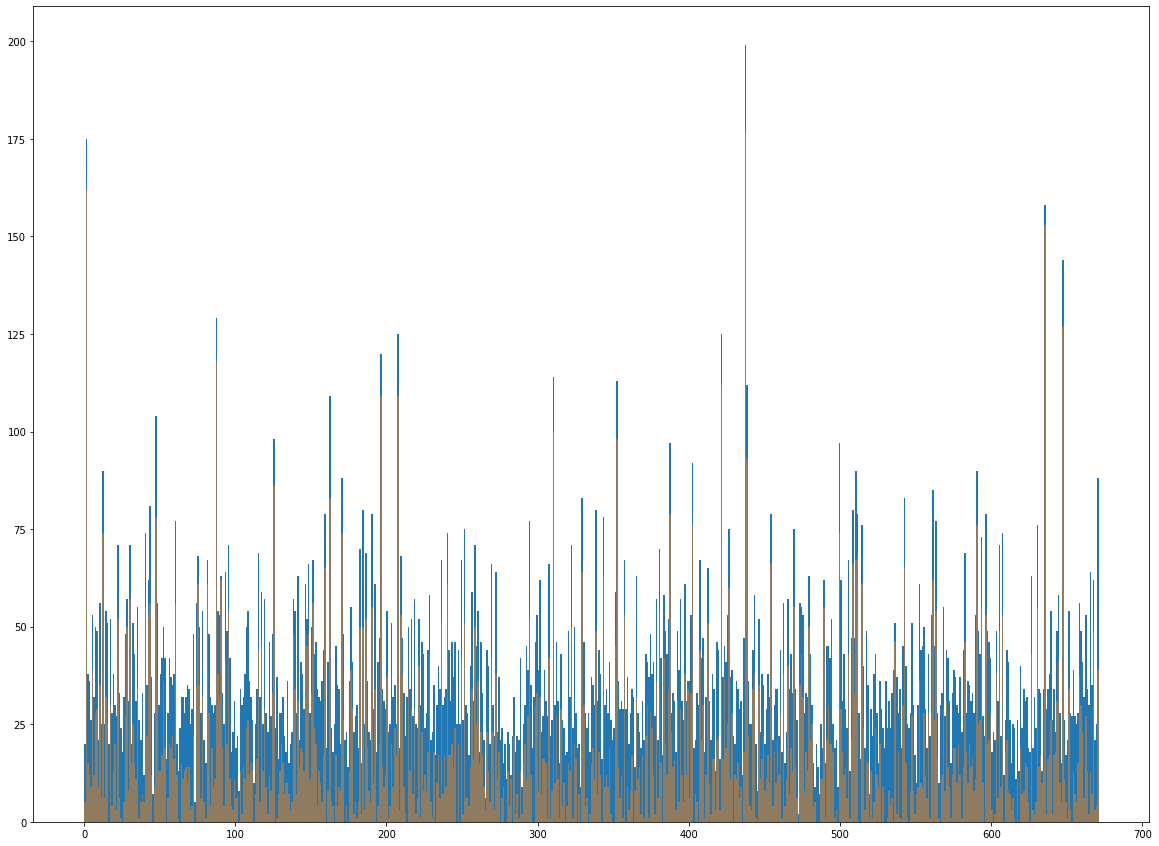

In [19]:
#histogram of subject
plt.figure(figsize=(20,15))
plt.hist(dfo.subject, bins=dfo.subject.max())
plt.hist(dfo["subject"][dfo.state==1],alpha=0.5,label="1", bins=dfo.subject.max())

#looks like there is no subjects used much often then others subjects,
#all subjects are used preliminarly equaly

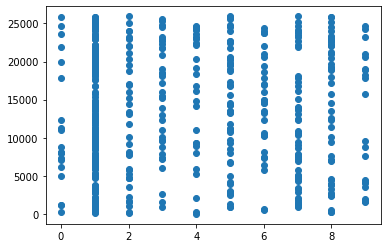

In [20]:
#scatterplot between sequence and subject (first 10  subjects) to see if any correlation
plt.scatter(dfo.subject[dfo.subject<10],dfo.sequence[dfo.subject<10])
#looks like no correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


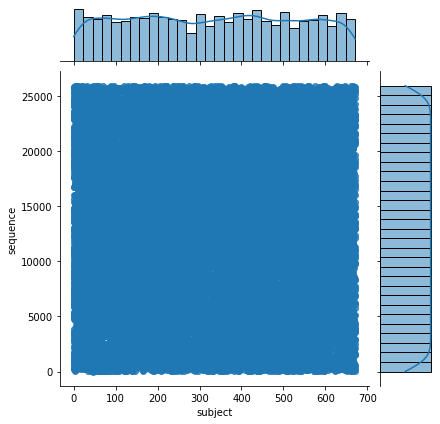

In [21]:
#look via jointplot to subject and sequence interaction
#to make it fast select only rows for second=0
sns.jointplot(dfo.subject,dfo.sequence,kind="reg")
#looks like no patter here, all subjects are ditributed more or less equaly between sequence

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

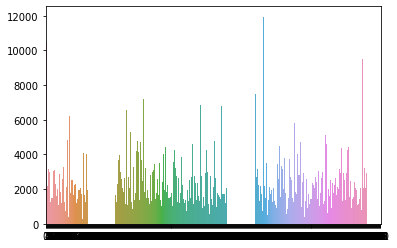

In [22]:
#subject is int feature, but by nature its category feature
counts=df.subject.value_counts()
sns.barplot(counts.index,counts.values)
#ids of subjects are grouped to 3 big groups

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

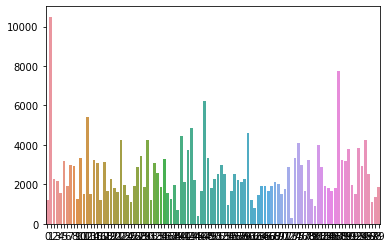

In [23]:
#look close at first 100 subjcts
counts=df.loc[df.subject<100,"subject"].value_counts()
sns.barplot(counts.index,counts.values)
#no groupping found, its subject with low accurancy (present in data several time)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

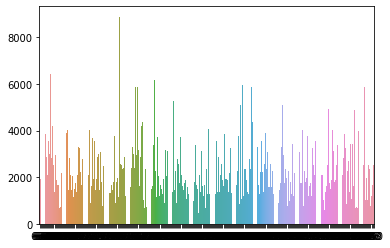

In [24]:
#look at subject in test data
counts=dftest.subject.value_counts()
sns.barplot(counts.index,counts.values)
#ids of subjects are grouped to 16 small groups

<AxesSubplot:>

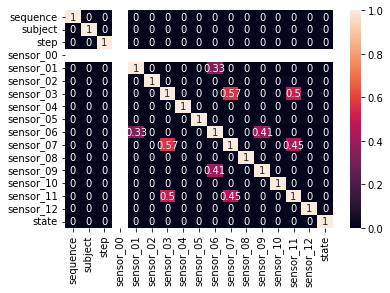

In [26]:
#correlation matrix
corrmatrix=df.corr()
corrmatrix=np.round(corrmatrix,2)
corrmatrix[np.abs(corrmatrix)<0.3]=0
sns.heatmap(corrmatrix, annot=True)
#we have correlation equal to 0.57 between sensor_07 and snsor_03,
#correlation equal to 0.53 between sensor_00 and snsor_06
#possibly it can help us later, but its not a big correlation

EDA step 3: features impact on target

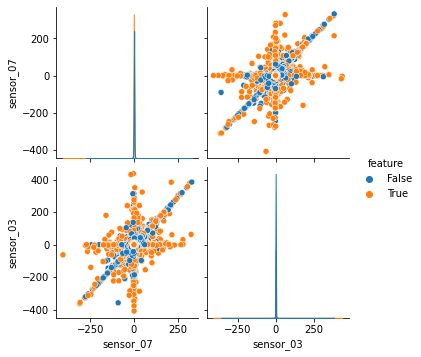

In [27]:
#features generation
df["feature"]=df["state"]==0
data=df[["feature","sensor_07","sensor_03"]]

sns.pairplot(data,hue="feature")
#no pattern found for state 0

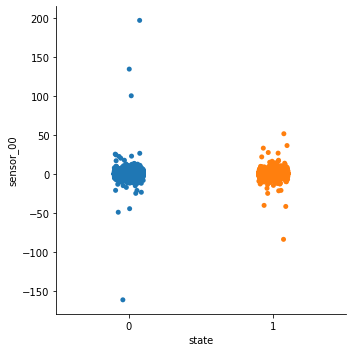

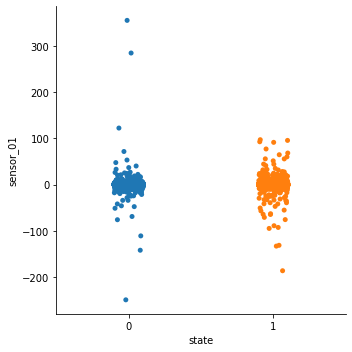

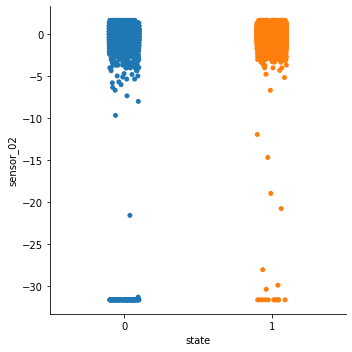

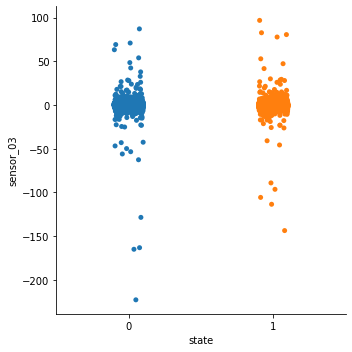

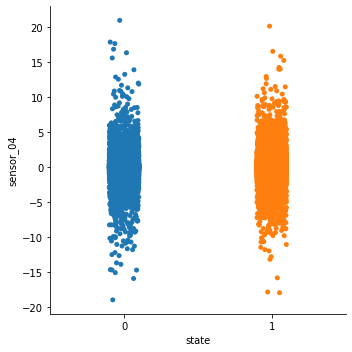

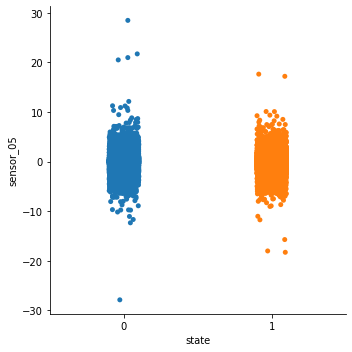

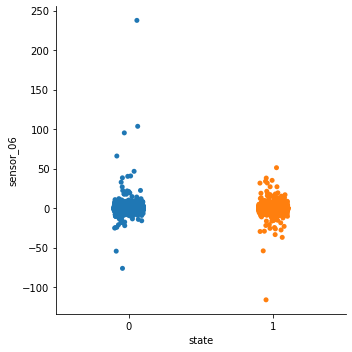

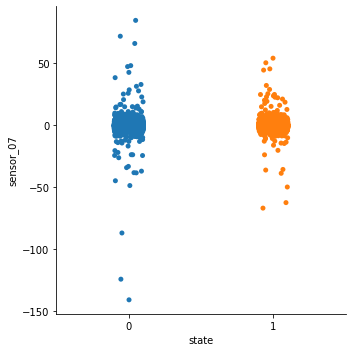

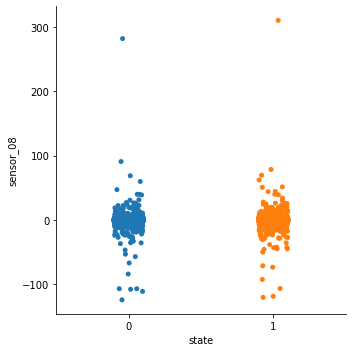

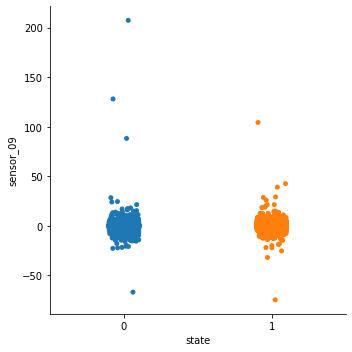

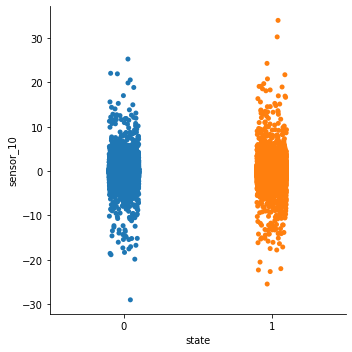

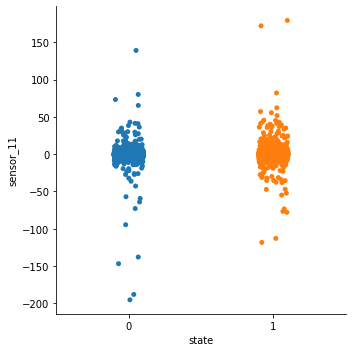

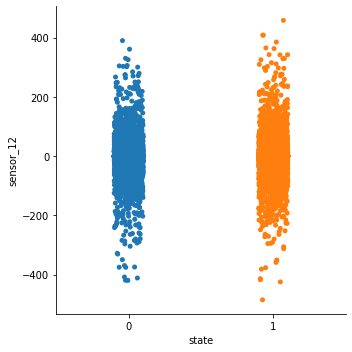

In [28]:
#check distribution of sensors for state 0 and state 1
for i in ["sensor_00","sensor_01","sensor_02","sensor_03","sensor_04","sensor_05","sensor_06","sensor_07","sensor_08","sensor_09","sensor_10","sensor_11","sensor_12"]:
    sns.catplot(x="state",y=i,data=dfo)
    plt.show()
#looks like some sensors have more outlier for state 0, but this hypothesis is week and take place only to rare date

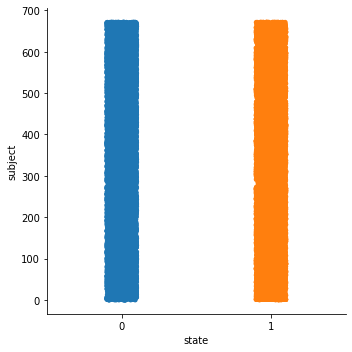

In [31]:
sns.catplot(x="state",y="subject",data=dfo)
#subjects are preliminarly equaly distributed between state 0 and 1

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='subject'>

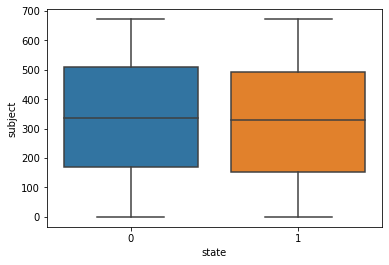

In [32]:
#or better
sns.boxplot(df.state,df.subject,whis=1.5)
#subject equaly distribute  for state 0 and 1

Distribution of state depending on subject

<BarContainer object of 672 artists>

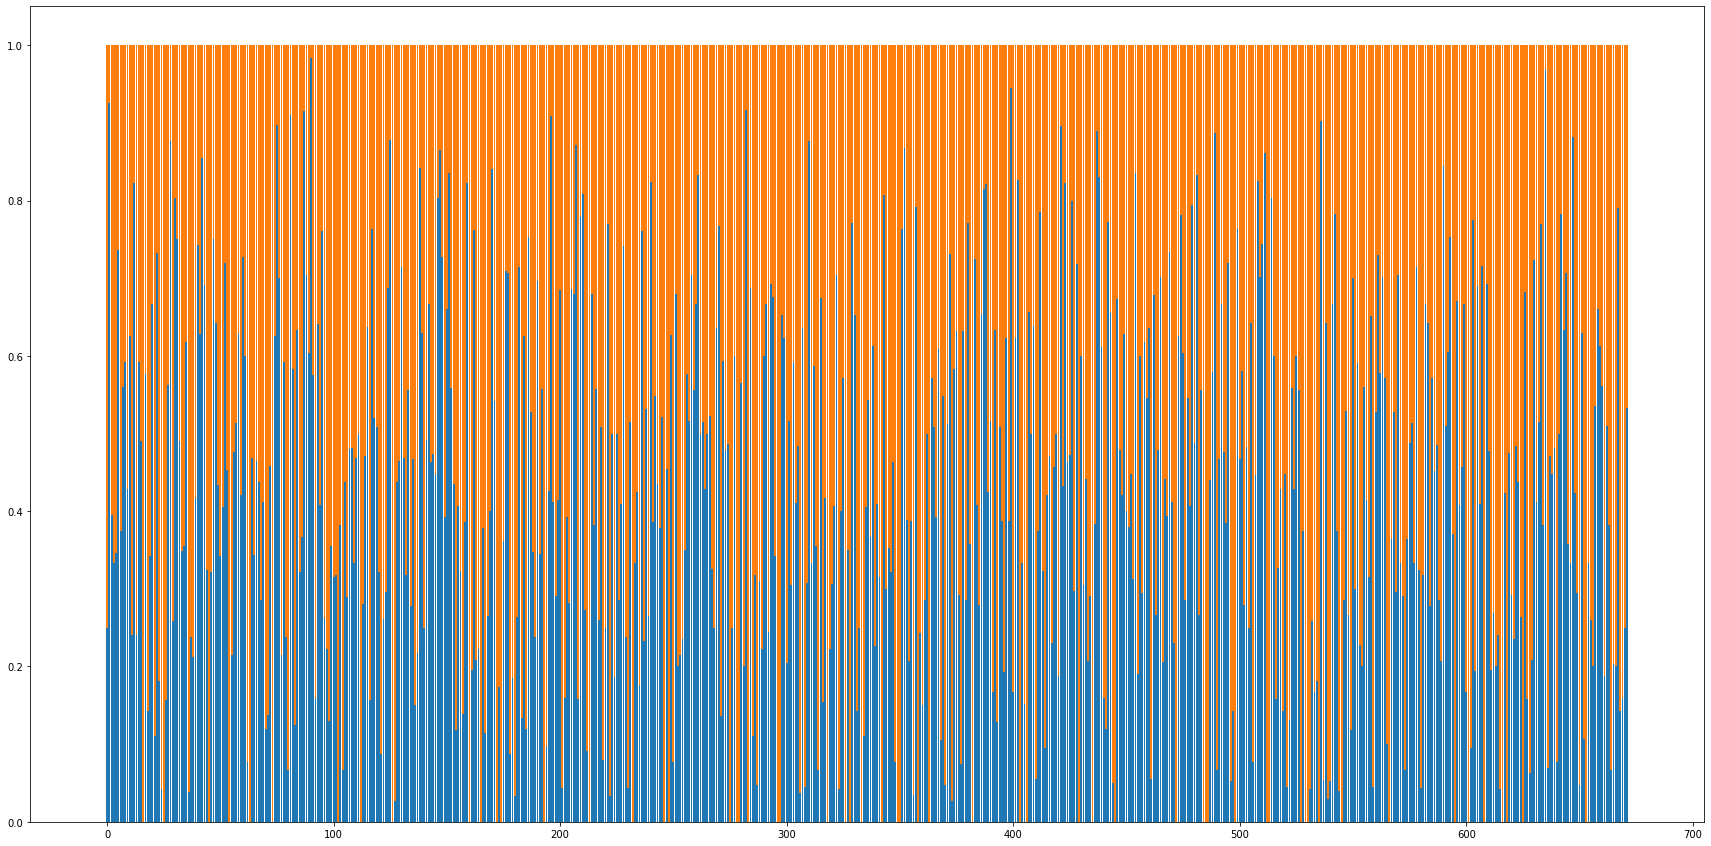

In [34]:
#select only first step of every sequence to have one line instead of 60 for every sequence
dfo=df[df.step==0]
#create normalzed crosstab of state and subject
data=pd.crosstab(dfo.subject,dfo.state, normalize="index").reset_index().sort_values(by=1,ascending=False)
data=data.rename(columns={0:"zero",1:"one"})
data.head()

#barplot for state for every subject to define if any pattern depending on subject
#oranges are persentage of 0s, blues are percentage of 1s
plt.figure(figsize=(30,15))
plt.bar(data.subject,data.one)
plt.bar(data.subject,data.zero, bottom=data.one)

In [ ]:
#eda conclusion:
#target distributed almost qeualy between 0s and 1s
#there's no NA values
#subject distributed evenly between states
#no found pattern is distribution of states between subjects
#sensors have no correlation between them
#all sensors has a lot of outliers
#all sensors without outliers are in [-2:2]
#target and features have no correlation


Evaluate algorithms

In [6]:
#train-validation split function
#better to mimic test. As seen of now test is sequences which continue train
#so train valid split is done next way: 30% (8k) of tail are validation
def trainvalidsplit(x):
    xtrain=x[x.sequence<=18000]
    xvalid=x[x.sequence>18000]
    ytrain=xtrain.pop("state")
    yvalid=xvalid.pop("state")
    return xtrain,xvalid,ytrain,yvalid

In [7]:
xtrain,xvalid,ytrain,yvalid=trainvalidsplit(df)
print(xtrain.shape)
print(ytrain.shape)
print(xvalid.shape)
print(yvalid.shape)

(1080060, 16)
(1080060,)
(478020, 16)
(478020,)


In [8]:
#validation function AUC
def aucvalue(yvalid,predictions):
    aucvalue= metrics.roc_auc_score( y_true=yvalid,y_score=predictions)
    return aucvalue

In [44]:
#train xgb model
model_xgb=XGBRegressor()
model_xgb.fit(xtrain,ytrain)
#xgboost predictions are probation by default,
#so predict and round to binary result
predictproba_xgb=model_xgb.predict(xvalid)
predictions_xgb = [round(value) for value in predictproba_xgb]
pred_xgb=np.array(predictions_xgb)
aucxgb=aucvalue(yvalid,pred_xgb)
aucxgb

0.566999385364668

In [ ]:
#result of preliminar model run
#model doesn't give big profit on data as is
#auc =0.5 is auc value for constant prediction
#and we have auc preliminarly = 0.5
#so no profit by modeling on data set as is because a lot of data
#need to update data to have less rows

In [ ]:
#Sensor data have a lot of outliers
#to be safe we will make two lines of data.
#one with outliers as is
#second without outliers
#and check models of both data lines

In [9]:
#remove sensors outliers
dfnoout=df.copy()
for i in range(3,16):
    data=dfnoout.iloc[:,i]
    print(data.describe())
    q_low=dfnoout.iloc[:,i].quantile(0.01)
    q_hi=dfnoout.iloc[:,i].quantile(0.99)
    dfnoout.loc[dfnoout.iloc[:,i]>q_hi]=dfnoout.iloc[:,i].median()
    dfnoout.loc[dfnoout.iloc[:,i]<q_low]=dfnoout.iloc[:,i].median()


count    1.558080e+06
mean     4.365526e-04
std      2.658684e+00
min     -3.750634e+02
25%     -5.000000e-01
50%     -3.091190e-03
75%      4.845440e-01
max      3.358246e+02
Name: sensor_00, dtype: float64
count    1.558080e+06
mean     7.281790e-03
std      3.113687e+00
min     -3.525882e+02
25%     -4.590336e-01
50%     -3.091190e-03
75%      4.705882e-01
max      4.495914e+02
Name: sensor_01, dtype: float64
count    1.558080e+06
mean    -2.038120e-01
std      2.233686e+00
min     -3.165948e+01
25%     -3.844864e-01
50%      0.000000e+00
75%      3.338469e-01
max      1.666667e+00
Name: sensor_02, dtype: float64
count    1.558080e+06
mean    -3.161731e-03
std      2.401792e+00
min     -4.083761e+02
25%     -4.424779e-01
50%     -3.091190e-03
75%      4.380531e-01
max      3.841982e+02
Name: sensor_03, dtype: float64
count    1.558080e+06
mean    -2.449713e-03
std      1.558988e+00
min     -2.362601e+01
25%     -4.104850e-01
50%     -3.091190e-03
75%      4.086461e-01
max      2.487

In [10]:
#combine  train and test to prepare semultaniously
dffull=pd.concat([df,dftest])
dfoutfull=pd.concat([dfnoout,dftest])

Feature enginering and data clean

In [ ]:
#no need to work with NA couse no NA values
#require reduce number of data

In [47]:
#will add mean, std,min max 25 50 75
dfgroupped=dffull.groupby(dffull.sequence, as_index=False).agg({'subject':'last','sensor_00':['mean','std','min','max','median'],'sensor_01':['mean','std','min','max','median'],'sensor_02':['mean','std','min','max','median'],'sensor_03':['mean','std','min','max','median'],'sensor_04':['mean','std','min','max','median'],'sensor_05':['mean','std','min','max','median'],'sensor_06':['mean','std','min','max','median'],'sensor_07':['mean','std','min','max','median'],'sensor_08':['mean','std','min','max','median'],'sensor_09':['mean','std','min','max','median'],'sensor_10':['mean','std','min','max','median'],'sensor_11':['mean','std','min','max','median'],'sensor_12':['mean','std','min','max','median']})
dfgroupped

sequence subject sensor_00                                            \
                  last      mean       std        min        max    median   
0            0      47  0.041744  1.431660  -5.634467   7.534003 -0.148764   
1            1      66 -0.069294  1.593907  -6.657651   5.870943 -0.031298   
2            2      66 -0.001546  1.147526  -2.797527   3.402628  0.058733   
3            3     542  0.029869  1.769705  -3.643740   4.856260 -0.119784   
4            4     437  0.059132  2.014779  -5.331530   5.455951  0.005410   
...        ...     ...       ...       ...        ...        ...       ...   
38181    38181     980 -0.047746  1.105589  -3.358578   5.135240 -0.101236   
38182    38182     915 -0.016473  4.500443 -13.154560  26.738794 -0.020866   
38183    38183     872 -0.005500  2.082974  -4.977589   8.312983 -0.093895   
38184    38184     835 -0.032573  3.185580  -8.993818   6.951314  0.421947   
38185    38185     773 -0.006839  0.730211  -2.400309   1.820711  0.005023   

      sensor_01                       ... sensor_11                         \
           mean       std        min  ...      mean        std         min   
0     -0.013025  1.509221  -3.002101  ...  0.010391   1.257716   -2.972222   
1     -0.019958  0.949403  -2.745798  ...  0.199914   1.774826   -3.573045   
2      0.025000  0.803884  -1.733193  ... -0.002932   0.611138   -1.705761   
3     -0.049177  1.914868  -5.860294  ... -0.026680   1.399494   -3.837449   
4      0.014916  1.385251  -5.898109  ... -0.099657   2.894626   -7.439300   
...         ...       ...        ...  ...       ...        ...         ...   
38181 -0.029289  0.865220  -2.942227  ... -0.019187   1.013227   -3.160494   
38182 -0.023547  7.808577 -42.550420  ... -0.068861  23.866845 -124.448560   
38183  0.039653  0.833157  -3.127101  ...  0.046931   0.978098   -2.248971   
38184 -0.022584  3.064000  -9.408613  ...  0.018210   2.718383   -6.011317   
38185 -0.056653  1.931864  -5.376050  ... -0.047308   1.837680   -5.097737   

                            sensor_12                                     \
              max    median      mean        std         min         max   
0        2.989712  0.193416 -1.286985   8.206880  -50.658994    6.674766   
1        8.044239  0.053498 -1.604085  50.291288 -160.234442  144.598039   
2        1.475309  0.083848  0.000945   0.361055   -1.044331    1.116795   
3        3.593621 -0.175926 -0.003708   0.241708   -0.837170    0.593350   
4        6.989712 -0.115741  0.000028   0.051600   -0.098465    0.135976   
...           ...       ...       ...        ...         ...         ...   
38181    1.830247  0.028292 -0.071398  89.874298 -152.523444  174.751492   
38182  102.877572 -0.064300  0.017271   0.415513   -0.813725    2.039216   
38183    2.804527  0.173354  0.009541   0.628490   -1.072890    1.105286   
38184    6.703704  0.205247 -0.001549   0.433795   -0.636402    0.819693   
38185    3.528807  0.121914  1.558234  92.680510 -161.786445  207.146633   

                  
          median  
0      -0.447997  
1      -0.009591  
2      -0.004902  
3      -0.012361  
4       0.002344  
...          ...  
38181   2.260017  
38182   0.002558  
38183  -0.050512  
38184  -0.114876  
38185  20.058397  

[38186 rows x 67 columns]

In [48]:
dfgroupped.columns=['sequence','subject','s00mean','s00std','s00min','s00max','s00median','s01mean','s01std','s01min','s01max','s01median','s02mean','s02std','s02min','s02max','s02median','s03mean','s03std','s03min','s03max','s03median','s04mean','s04std','s04min','s04max','s04median','s05mean','s05std','s05min','s05max','s05median','s06mean','s06std','s06min','s06max','s06median','s07mean','s07std','s07min','s07max','s07median','s08mean','s08std','s08min','s08max','s08median','s09mean','s09std','s09min','s09max','s09median','s10mean','s10std','s10min','s10max','s10median','s11mean','s11std','s11min','s11max','s11median','s12mean','s12std','s12min','s12max','s12median']

In [49]:
dfgroupped

,sequence,subject,s00mean,s00std,s00min,s00max,s00median,s01mean,s01std,s01min,...,s11mean,s11std,s11min,s11max,s11median,s12mean,s12std,s12min,s12max,s12median
0,0,47,0.041744,1.431660,-5.634467,7.534003,-0.148764,-0.013025,1.509221,-3.002101,...,0.010391,1.257716,-2.972222,2.989712,0.193416,-1.286985,8.206880,-50.658994,6.674766,-0.447997
1,1,66,-0.069294,1.593907,-6.657651,5.870943,-0.031298,-0.019958,0.949403,-2.745798,...,0.199914,1.774826,-3.573045,8.044239,0.053498,-1.604085,50.291288,-160.234442,144.598039,-0.009591
2,2,66,-0.001546,1.147526,-2.797527,3.402628,0.058733,0.025000,0.803884,-1.733193,...,-0.002932,0.611138,-1.705761,1.475309,0.083848,0.000945,0.361055,-1.044331,1.116795,-0.004902
3,3,542,0.029869,1.769705,-3.643740,4.856260,-0.119784,-0.049177,1.914868,-5.860294,...,-0.026680,1.399494,-3.837449,3.593621,-0.175926,-0.003708,0.241708,-0.837170,0.593350,-0.012361
4,4,437,0.059132,2.014779,-5.331530,5.455951,0.005410,0.014916,1.385251,-5.898109,...,-0.099657,2.894626,-7.439300,6.989712,-0.115741,0.000028,0.051600,-0.098465,0.135976,0.002344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,38181,980,-0.047746,1.105589,-3.358578,5.135240,-0.101236,-0.029289,0.865220,-2.942227,...,-0.019187,1.013227,-3.160494,1.830247,0.028292,-0.071398,89.874298,-152.523444,174.751492,2.260017
38182,38182,915,-0.016473,4.500443,-13.154560,26.738794,-0.020866,-0.023547,7.808577,-42.550420,...,-0.068861,23.866845,-124.448560,102.877572,-0.064300,0.017271,0.415513,-0.813725,2.039216,0.002558
38183,38183,872,-0.005500,2.082974,-4.977589,8.312983,-0.093895,0.039653,0.833157,-3.127101,...,0.046931,0.978098,-2.248971,2.804527,0.173354,0.009541,0.628490,-1.072890,1.105286,-0.050512
38184,38184,835,-0.032573,3.185580,-8.993818,6.951314,0.421947,-0.022584,3.064000,-9.408613,...,0.018210,2.718383,-6.011317,6.703704,0.205247,-0.001549,0.433795,-0.636402,0.819693,-0.114876


In [57]:
#add 25 and 75 quantile columns
df25=dffull.groupby(dffull.sequence, as_index=False).quantile(q=0.25)
df75=dffull.groupby(dffull.sequence, as_index=False).quantile(q=0.75)

df25.columns=['sequence','subject','step','s00_25','s01_25','s02_25','s03_25','s04_25','s05_25','s06_25','s07_25','s08_25','s09_25','s10_25','s11_25','s12_25','state']
df75.columns=['sequence','subject','step','s00_75','s01_75','s02_75','s03_75','s04_75','s05_75','s06_75','s07_75','s08_75','s09_75','s10_75','s11_75','s12_75','state']

df25=df25.drop(['subject','step','state'], axis=1)
df75=df75.drop(['subject','step','state'],axis=1)

dffinal=dfgroupped.merge(df25, on='sequence',how='left')
dffinal=dffinal.merge(df75, on='sequence',how='left')
dffinal

In [11]:
#get sequence values for train and test data set to split data frame
trainseqlist=df.sequence.to_list()
trainseqlist=set(trainseqlist)
trainseqlist=list(trainseqlist)

testseqlist=dftest.sequence.to_list()
testseqlist=set(testseqlist)
testseqlist=list(testseqlist)

In [69]:
dftrain=dffinal.loc[dffinal.sequence.isin(trainseqlist),:]
dftrain

,sequence,subject,s00mean,s00std,s00min,s00max,s00median,s01mean,s01std,s01min,...,s03_75,s04_75,s05_75,s06_75,s07_75,s08_75,s09_75,s10_75,s11_75,s12_75
0,0,47,0.041744,1.431660,-5.634467,7.534003,-0.148764,-0.013025,1.509221,-3.002101,...,0.437389,0.475891,0.342184,0.695128,0.410115,0.725,0.656250,0.643730,0.748200,3.222187
1,1,66,-0.069294,1.593907,-6.657651,5.870943,-0.031298,-0.019958,0.949403,-2.745798,...,0.653761,0.614672,0.789828,0.431922,0.414885,0.600,0.453757,0.586916,0.686728,0.197038
2,2,66,-0.001546,1.147526,-2.797527,3.402628,0.058733,0.025000,0.803884,-1.733193,...,0.595575,0.745060,0.586013,0.548725,1.887977,0.725,0.330022,0.382727,0.395062,0.173167
3,3,542,0.029869,1.769705,-3.643740,4.856260,-0.119784,-0.049177,1.914868,-5.860294,...,0.692257,0.125218,0.734106,0.824454,0.692366,1.200,1.747652,0.238998,0.596193,0.110294
4,4,437,0.059132,2.014779,-5.331530,5.455951,0.005410,0.014916,1.385251,-5.898109,...,1.217699,0.436900,1.230553,1.158015,1.116412,0.425,0.720376,0.314250,1.409979,0.024616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,25963,558,0.100773,1.547826,-3.738022,3.974498,0.193586,0.007073,1.985067,-4.287815,...,1.501770,0.122600,0.713538,0.864754,0.810305,0.600,0.802926,0.126235,2.066101,0.041027
25964,25964,297,0.017182,1.054727,-5.220247,2.927357,0.051777,0.004814,0.962603,-3.253151,...,0.423230,0.789221,1.108826,0.702186,0.429580,4.275,0.601698,0.823038,0.413323,13.383205
25965,25965,129,-0.006466,1.227428,-3.422720,2.818393,-0.039413,0.004447,1.317566,-2.378151,...,0.794469,0.520345,0.427636,0.726093,2.225763,0.750,1.822977,1.847926,1.059414,0.688619
25966,25966,170,-0.040417,0.885836,-2.069552,1.710974,-0.051391,0.003256,5.877563,-34.113445,...,0.834735,0.883197,0.135004,0.605419,0.514313,0.500,0.276373,1.517582,1.190072,11.254689


In [70]:
dftrain=dftrain.merge(dftrainl, on="sequence",how="left")
dftrain

,sequence,subject,s00mean,s00std,s00min,s00max,s00median,s01mean,s01std,s01min,...,s04_75,s05_75,s06_75,s07_75,s08_75,s09_75,s10_75,s11_75,s12_75,state
0,0,47,0.041744,1.431660,-5.634467,7.534003,-0.148764,-0.013025,1.509221,-3.002101,...,0.475891,0.342184,0.695128,0.410115,0.725,0.656250,0.643730,0.748200,3.222187,0
1,1,66,-0.069294,1.593907,-6.657651,5.870943,-0.031298,-0.019958,0.949403,-2.745798,...,0.614672,0.789828,0.431922,0.414885,0.600,0.453757,0.586916,0.686728,0.197038,1
2,2,66,-0.001546,1.147526,-2.797527,3.402628,0.058733,0.025000,0.803884,-1.733193,...,0.745060,0.586013,0.548725,1.887977,0.725,0.330022,0.382727,0.395062,0.173167,1
3,3,542,0.029869,1.769705,-3.643740,4.856260,-0.119784,-0.049177,1.914868,-5.860294,...,0.125218,0.734106,0.824454,0.692366,1.200,1.747652,0.238998,0.596193,0.110294,1
4,4,437,0.059132,2.014779,-5.331530,5.455951,0.005410,0.014916,1.385251,-5.898109,...,0.436900,1.230553,1.158015,1.116412,0.425,0.720376,0.314250,1.409979,0.024616,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,25963,558,0.100773,1.547826,-3.738022,3.974498,0.193586,0.007073,1.985067,-4.287815,...,0.122600,0.713538,0.864754,0.810305,0.600,0.802926,0.126235,2.066101,0.041027,1
25964,25964,297,0.017182,1.054727,-5.220247,2.927357,0.051777,0.004814,0.962603,-3.253151,...,0.789221,1.108826,0.702186,0.429580,4.275,0.601698,0.823038,0.413323,13.383205,0
25965,25965,129,-0.006466,1.227428,-3.422720,2.818393,-0.039413,0.004447,1.317566,-2.378151,...,0.520345,0.427636,0.726093,2.225763,0.750,1.822977,1.847926,1.059414,0.688619,1
25966,25966,170,-0.040417,0.885836,-2.069552,1.710974,-0.051391,0.003256,5.877563,-34.113445,...,0.883197,0.135004,0.605419,0.514313,0.500,0.276373,1.517582,1.190072,11.254689,1


In [71]:
dftest=dffinal.loc[dffinal.sequence.isin(testseqlist),:]
dftest

,sequence,subject,s00mean,s00std,s00min,s00max,s00median,s01mean,s01std,s01min,...,s03_75,s04_75,s05_75,s06_75,s07_75,s08_75,s09_75,s10_75,s11_75,s12_75
25968,25968,684,-0.002602,1.091741,-4.950541,3.146832,-0.002318,-0.036432,4.499484,-21.747899,...,0.493584,0.580507,1.531788,0.375911,0.576527,1.125,0.534321,0.274583,0.567901,0.248721
25969,25969,935,0.028516,1.450040,-3.675425,5.816074,-0.015842,0.002276,0.775379,-2.259454,...,0.646239,0.531336,0.685116,0.532332,0.565267,0.500,0.269328,0.318412,0.582305,0.626705
25970,25970,924,0.057664,5.083618,-15.005410,12.306028,1.079212,-0.021796,2.903657,-5.611345,...,1.096903,1.567432,0.089753,2.088798,1.172328,0.400,1.290282,2.679780,1.392490,15.728367
25971,25971,769,-0.004791,0.914917,-2.465997,2.876352,-0.033617,0.014863,0.950923,-2.591387,...,0.610619,0.313797,0.512902,0.344262,0.318702,0.400,0.315932,0.211931,0.253601,0.868713
25972,25972,764,-0.001443,2.783685,-9.974498,17.295209,-0.171947,-0.025350,23.942241,-136.376050,...,0.373009,1.254878,0.801795,0.364526,0.453053,0.400,0.479588,2.092210,0.542953,137.517263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,38181,980,-0.047746,1.105589,-3.358578,5.135240,-0.101236,-0.029289,0.865220,-2.942227,...,0.516150,1.103786,0.457928,0.365437,0.490458,1.600,0.388548,7.511366,0.691615,71.081948
38182,38182,915,-0.016473,4.500443,-13.154560,26.738794,-0.020866,-0.023547,7.808577,-42.550420,...,0.366593,0.617091,0.439604,0.369080,0.254771,0.500,0.222724,0.368711,0.412037,0.142583
38183,38183,872,-0.005500,2.082974,-4.977589,8.312983,-0.093895,0.039653,0.833157,-3.127101,...,0.525221,0.194069,0.265520,0.625911,0.471183,0.525,0.278902,0.425256,0.587449,0.512148
38184,38184,835,-0.032573,3.185580,-8.993818,6.951314,0.421947,-0.022584,3.064000,-9.408613,...,1.697124,0.288773,0.721017,2.140255,1.345992,0.200,1.742594,1.244553,1.992284,0.368819


In [72]:
xtrain,xvalid,ytrain,yvalid=trainvalidsplit(dftrain)
print(xtrain.shape)
print(ytrain.shape)
print(xvalid.shape)
print(yvalid.shape)

(18001, 93)
(18001,)
(7967, 93)
(7967,)


In [73]:
#train xgb model
model_xgb=XGBRegressor()
model_xgb.fit(xtrain,ytrain)
#xgboost predictions are probation by default,
#so predict and round to binary result
predictproba_xgb=model_xgb.predict(xvalid)
predictions_xgb = [round(value) for value in predictproba_xgb]
pred_xgb=np.array(predictions_xgb)
aucxgb=aucvalue(yvalid,pred_xgb)
aucxgb
#on new train xgb auc is much better, its 0.81 and was 0.53

0.8124874510093075

In [74]:
model_lr= LogisticRegression(solver='liblinear', multi_class='ovr')
model_lr.fit(xtrain,ytrain)
predictproba_lr=model_lr.predict(xvalid)
auclr=aucvalue(yvalid,predictproba_lr)
auclr

0.7183744637728836

In [75]:
model_knn=KNeighborsClassifier()
model_knn.fit(xtrain,ytrain)
predictproba_knn=model_knn.predict(xvalid)
aucknn=aucvalue(yvalid,predictproba_knn)
aucknn

0.5147404714324156

In [76]:
model_dt= DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)
predictproba_dt=model_dt.predict(xvalid)
aucdt=aucvalue(yvalid,predictproba_dt)
aucdt

0.6944291934425733

In [77]:
model_nb=GaussianNB()
model_nb.fit(xtrain, ytrain)
predictproba_nb=model_nb.predict(xvalid)
aucnb=aucvalue(yvalid,predictproba_nb)
aucnb

0.5324325474025716

In [78]:
model_svm=SVC(gamma='auto')
model_svm.fit(xtrain,ytrain)
predictproba_svm=model_svm.predict(xvalid)
aucsvm=aucvalue(yvalid,predictproba_svm)
aucsvm

0.5002523977788995

In [ ]:
#xgboost has hier auc 0.81 than all others models on data set with NEW features and WITH sensors outliers

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

my_model = XGBRegressor(random_state=0).fit(xtrain, ytrain)
perm = PermutationImportance(my_model, random_state=1).fit(xvalid, yvalid)
eli5.show_weights(perm, feature_names = xvalid.columns.tolist())
#all columns has low weight, s02std is top
#require add some valuable columns and remove not important

In [ ]:
#on data set WITHOUT sensors outliers xgboost has lower auc 0.77 than on full data 0.81
#so this part of code deleted from main version of notebook

Remove not important columns

In [ ]:
output=pd.DataFrame({"sequence":dftest.sequence,"state":dfstest.state})
output.to_csv("submission.csv",index=False)

In [ ]:
output